[View in Colaboratory](https://colab.research.google.com/github/Hamahmi/machine-learning/blob/master/MNIST.ipynb)

## Using Neural Network to classify MNIST Dataset

### Importing All Libraries

I prefere that all importings to be first but ofcourse you can import anywhere (This is Python, not as restrected as java :D )

In [1]:
# Import libraries necessary for this project

import numpy as np

from keras.datasets       import mnist
from keras.utils.np_utils import to_categorical
from keras.models         import Sequential
from keras.layers         import Dense
from keras.layers         import Dropout
from matplotlib.pyplot    import imshow
from PIL                  import Image
from random               import randint


print("\nImporting ✓\n")

Using TensorFlow backend.



Importing ✓



### Loading the Data
Loading the data and getting information about it.

In [2]:
# Load the Iris dataset

(train_set_1, train_set_2), (test_set_1, test_set_2) = mnist.load_data()

print("\nLoading ✓\n")
print("Train set 1 size: ", train_set_1.size/train_set_1[0].size)
print("Test  set 1 size: ",  test_set_1.size/ test_set_1[0].size)


Loading ✓

Train set 1 size:  60000.0
Test  set 1 size:  10000.0


### Exploring the data


2


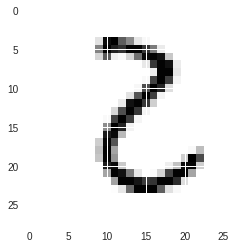

In [3]:
%matplotlib inline
# everytime you run you'll get another data point 
random = randint(0, 60000)
print (train_set_2[random])
imshow(train_set_1[random])

### Reshaping the Data to fit the Model

In [4]:
train_set_1 = train_set_1.reshape(train_set_1.shape[0], -1)
test_set_1 = test_set_1.reshape(test_set_1.shape[0], -1)

train_set_1 = train_set_1 / 255
test_set_1 = test_set_1 / 255
print (train_set_1.shape)
print (test_set_1.shape)
train_set_2 = to_categorical(train_set_2,num_classes = 10)
test_set_2 = to_categorical(test_set_2,num_classes = 10)
print(train_set_2.shape)
print(test_set_2.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


## Selectin the Model

The model is 1 hidden layar with 900 neurons, ReLU and an output layar with 10 neurons, Softmax

In [5]:
model = Sequential()

# Hidden layer
model.add(Dense(units=900, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=10, activation='softmax'))

# compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.output_shape)

(None, 10)


### Training the Model

In [6]:
model.fit(train_set_1, train_set_2, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
 - 7s - loss: 0.2940 - acc: 0.9150
Epoch 2/10
 - 7s - loss: 0.1252 - acc: 0.9630
Epoch 3/10
 - 8s - loss: 0.0872 - acc: 0.9745
Epoch 4/10
 - 8s - loss: 0.0667 - acc: 0.9801
Epoch 5/10
 - 8s - loss: 0.0521 - acc: 0.9841
Epoch 6/10
 - 8s - loss: 0.0441 - acc: 0.9862
Epoch 7/10
 - 8s - loss: 0.0359 - acc: 0.9892
Epoch 8/10
 - 8s - loss: 0.0300 - acc: 0.9906
Epoch 9/10
 - 8s - loss: 0.0253 - acc: 0.9921
Epoch 10/10
 - 8s - loss: 0.0212 - acc: 0.9938


### Finally The results to evaluate the model

#### First on the training set

In [7]:
(error, accuracy) = model.evaluate(train_set_1, train_set_2)
print( "train error = ", error)
print("accuracy = ", accuracy*100, "%")

60000/60000 [==============================] - 5s 75us/step
train error =  0.009444613065679248
accuracy =  99.80166666666666 %


#### Then on the testing set 

In [8]:
(error, accuracy) = model.evaluate(test_set_1, test_set_2)
print( "test error = ", error)
print("accuracy = ", accuracy*100, "%")

10000/10000 [==============================] - 1s 68us/step
test error =  0.05460691080382676
accuracy =  98.42999999999999 %


*End of the Project :)*